In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import multiprocessing

import nltk

In [4]:
df = pd.read_csv('sample_data.csv')
df

,Unnamed: 0,text,class
0,19771,worldnew norwegian policeman jail year drug ca...,1
1,1874,news steve bannon threaten trump remov nation ...,0
2,3035,politicsnew key republican collin seriou conce...,1
3,7134,news texa teacher call year old boy terrorist ...,0
4,15473,worldnew egypt western desert attack expos fro...,1
...,...,...,...
44893,12329,polit colleg remov burn american flag protest ...,0
44894,14496,worldnew u n plead end yemen blockad untold th...,1
44895,14334,worldnew zimbabw mugab contact oust vice presi...,1
44896,16352,worldnew south korea say accept releas south k...,1


- Splits data into label and features
- Y represents fake or real news
- X represents subject, title and content

In [5]:
X = df['text']
Y = df['class']

In [6]:
X, Y

(0        news watch desper american liter beg justin tr...
 1        worldnew kenyan elect board chairman say hard ...
 2        news watch trump admit america pay dumb billio...
 3        polit breitbart joel pollack brilliantli shut ...
 4        polit pope invit radic pro abort socialist nam...
                                ...                        
 44893    polit break american hostag taken iran back ho...
 44894    polit bitter radic eric holder goe orang man p...
 44895    polit second drama mccain vote betray make ant...
 44896    politicsnew obama slam trump promis roll back ...
 44897    worldnew india china need avoid border disput ...
 Name: text, Length: 44898, dtype: object,
 0        0
 1        1
 2        0
 3        0
 4        0
         ..
 44893    0
 44894    0
 44895    0
 44896    1
 44897    1
 Name: class, Length: 44898, dtype: int64)

In [7]:
Y = Y.values
Y

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

#  TF-IDF (Statistical measurment of importance of word)

- Converts data to numerical format 
- Data will be stored as a matrix with TF-IDF values
- Fit method learns frequency and vocabulary in data

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Creating an instance of the TfidfVectorizer class
vectorizer = TfidfVectorizer()

# Fitting the vectorizer on the training data X
vectorizer.fit(X)

# Transforming the textual data in X into numerical data using the fitted vectorizer
X = vectorizer.transform(X)

#TF-IDF values each term based on occurences in relation to total terms in the data
#We chose the TF-IDF algorithm based on it's simplicity and effectivness
X

<44898x90760 sparse matrix of type '<class 'numpy.float64'>'
	with 6943679 stored elements in Compressed Sparse Row format>

In [24]:
#splitting the data to training and testing sets
#decided to use the 0.75 : 0.25 model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

#  Linear regression model

Forms a linear relationship between the input features (X) and target variables (Y)
It will calculate the weightened sum of the input features using a sigmoid function
Returns either a 0 or 1 to represent if the news are real or fake

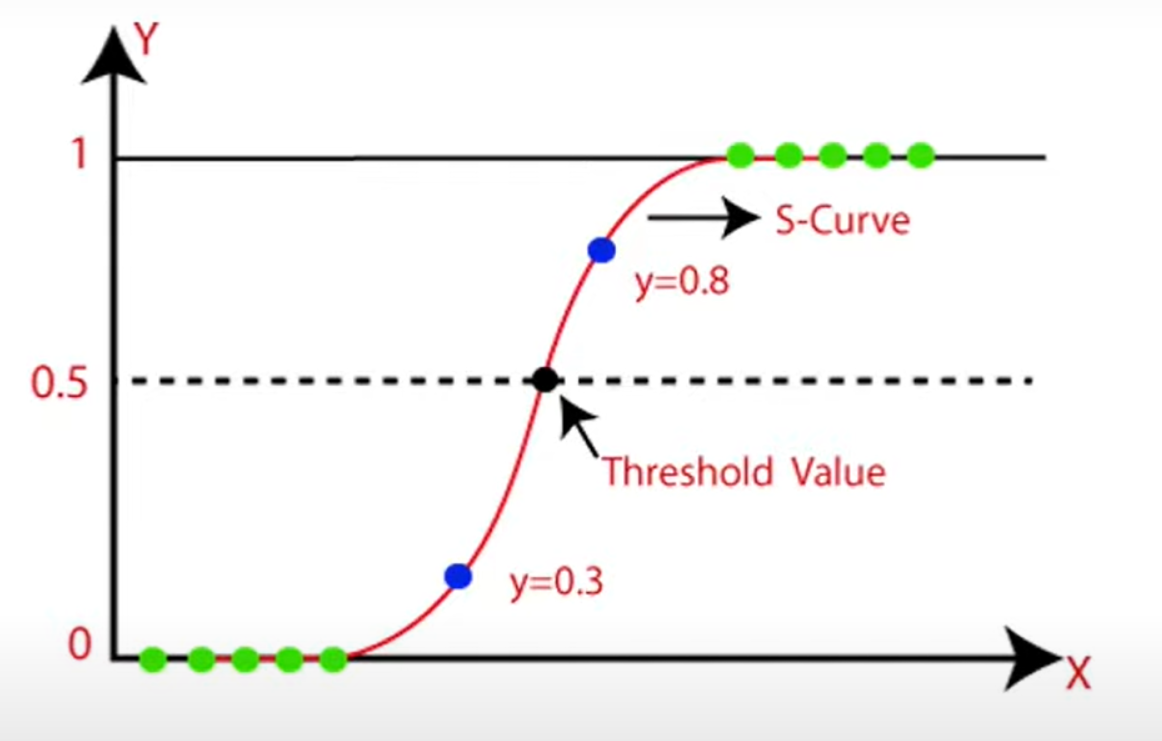

In [10]:
#linear regression model for binary classification problem
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
model.fit(X_train, Y_train)

LogisticRegression()

In [12]:
#Accuracy score of 99.05%
model.score(X_test, Y_test)

0.990467706013363

#  Decision Tree Model

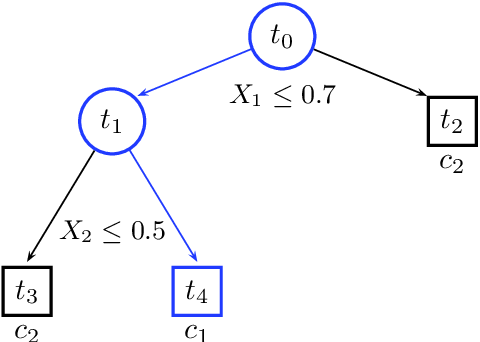

- Recursivly splits datasets to create a tree based on features
- Likely splits based on word frequency (certain words might be used more in fake news articles
- Likely splits on word sentiment (fake news might have more provoking language)
- Names and keywords (fake news might use more names, specifically in titles)
- Grammar and syntax (fake news might have worse grammar)

All of these features made the decision tree model more accurate than the linear regression model. However it required 5 times as long for it's training

In [13]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [14]:
#Accuracy score of 99.73%
DT.score(X_test, Y_test)

0.9973273942093541

In [15]:
pred_DT = DT.predict(X_test)
print(classification_report(Y_test, pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5939
           1       1.00      1.00      1.00      5286

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

